In [39]:
import sys
import os

# Obtém o caminho do diretório do script atual
script_dir = os.getcwd()

# Adiciona o diretório pai ao caminho do sistema
sys.path.append(script_dir)

In [40]:
import pygame # Nos repositórios de referência essa lib é sempre importada tendo em vista que o gymnasium (gym) utiliza a mesma, deve evitar problemas

import time # será utilizada para coletar o período temporal necessário para que algumas funções sejam executadas
import numpy as np # numpy por motivos óbvios  

import torch # Todas as redes neurais serão criados utilizando PyTorch
import torch.nn as nn
import torch.optim as optim

from redes_neurais.rede_MLP import MLP
from func_aux.auxiliares import *

import matplotlib.pyplot as plt # Demonstração de Gráficos e imagens 

In [41]:
nome_arquivo = f'redes_analisadas_5.pkl'
redes_analisadas_1 = recarregar_dados("redes_analisadas_1.pkl")
redes_analisadas_2 = recarregar_dados("redes_analisadas_2.pkl")
redes_analisadas_3 = recarregar_dados("redes_analisadas_3.pkl")
redes_analisadas_4 = recarregar_dados("redes_analisadas_4.pkl")
redes_analisadas_5 = recarregar_dados("redes_analisadas_5.pkl")
redes_analisadas_6 = recarregar_dados("redes_analisadas_6.pkl")
redes_analisadas_7 = recarregar_dados("redes_analisadas_7.pkl")
redes_analisadas_8 = recarregar_dados("redes_analisadas_8.pkl")
redes_analisadas_9 = recarregar_dados("redes_analisadas_9.pkl")


Dados recarregados de redes_analisadas_1.pkl.
Dados recarregados de redes_analisadas_2.pkl.
Dados recarregados de redes_analisadas_3.pkl.
Dados recarregados de redes_analisadas_4.pkl.
Dados recarregados de redes_analisadas_5.pkl.
Dados recarregados de redes_analisadas_6.pkl.
Dados recarregados de redes_analisadas_7.pkl.
Dados recarregados de redes_analisadas_8.pkl.
Dados recarregados de redes_analisadas_9.pkl.


In [42]:
print(redes_analisadas_5)

[155, 824, 106, 926, 192, 102, 291, 303, 267, 752, 262, 782, 353, 1212, 22, 1199, 513, 780, 800, 1754, 630, 1039, 622, 1467, 311, 146, 354, 191, 241, 1146, 38, 823, 342, 474, 53, 970, 519, 1119, 146, 523, 1427, 120, 92, 260, 392, 339, 483, 219, 893, 524, 1226, 109, 1108, 288, 161, 328, 671, 267, 1382, 461, 538, 487, 724, 196, 1359, 330, 1042, 653, 207, 307, 275, 204, 371, 402, 119, 96, 1073, 35, 452, 598, 36, 779, 1021, 371, 177, 121, 1243, 21, 321, 448, 72, 416, 2307, 1298, 558, 749]


In [43]:
Dados_CartPole_True_Pais = redes_analisadas_1[0]
Dados_CartPole_False_Pais = redes_analisadas_2[1]
Dados_Acrobot_True_Pais = redes_analisadas_3[0]
Dados_Acrobot_False_Pais = redes_analisadas_4[0]
Dados_CartPole_PPO = redes_analisadas_5
Dados_CartPole_True_Aleatorio = redes_analisadas_6[0]
Dados_CartPole_False_Aleatorio = redes_analisadas_7[1]
Dados_CartPole_True_Aleatorio_refinado = redes_analisadas_8[0]
Dados_CartPole_False_Aleatorio_refinado = redes_analisadas_9[0]

In [44]:
print(Dados_CartPole_True_Aleatorio)

{'Nome do ambiente': 'CartPole', 'Tempo Total': 11.614622831344604, 'recompencas por geracao': [[10.0, 29.0, 10.0, 9.0, 10.0, 11.0, 9.0, 14.0, 9.0, 15.0, 10.0, 9.0, 8.0, 10.0, 8.0, 10.0, 8.0, 42.0, 10.0, 8.0, 9.0, 19.0, 13.0, 13.0, 9.0, 10.0, 10.0, 10.0, 8.0, 10.0], [9.0, 10.0, 10.0, 9.0, 9.0, 10.0, 22.0, 40.0, 10.0, 10.0, 10.0, 35.0, 13.0, 9.0, 9.0, 10.0, 9.0, 10.0, 8.0, 9.0, 33.0, 10.0, 9.0, 9.0, 28.0, 24.0, 20.0, 10.0, 8.0, 9.0], [8.0, 15.0, 10.0, 9.0, 8.0, 10.0, 10.0, 25.0, 8.0, 9.0, 8.0, 19.0, 22.0, 17.0, 9.0, 9.0, 19.0, 10.0, 9.0, 10.0, 10.0, 13.0, 28.0, 31.0, 36.0, 18.0, 14.0, 16.0, 10.0, 10.0], [89.0, 26.0, 10.0, 10.0, 9.0, 10.0, 9.0, 15.0, 10.0, 8.0, 23.0, 10.0, 12.0, 10.0, 10.0, 9.0, 8.0, 9.0, 33.0, 34.0, 10.0, 44.0, 9.0, 10.0, 19.0, 16.0, 20.0, 10.0, 9.0, 9.0], [19.0, 11.0, 16.0, 10.0, 45.0, 18.0, 8.0, 12.0, 10.0, 9.0, 20.0, 8.0, 30.0, 104.0, 13.0, 14.0, 9.0, 28.0, 10.0, 35.0, 10.0, 10.0, 9.0, 10.0, 137.0, 44.0, 19.0, 9.0, 10.0, 9.0], [36.0, 9.0, 11.0, 40.0, 8.0, 46.0, 9.0, 

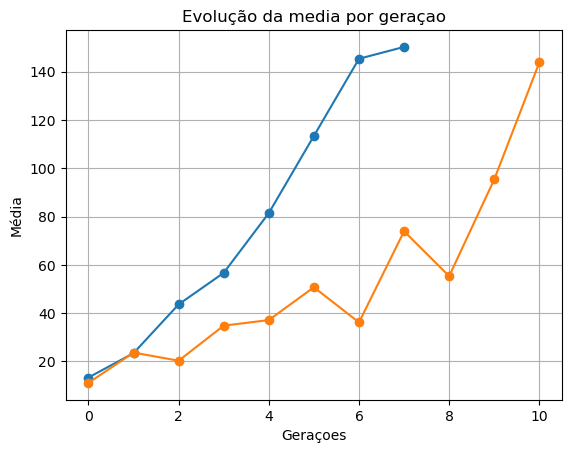

In [45]:
# Lista para armazenar as médias
medias_Dados_CartPole_True_Pais = []
medias_Dados_CartPole_False_Pais = []

# Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_True_Pais["recompencas por geracao"]:
    media = calcular_media(lista)
    medias_Dados_CartPole_True_Pais.append(media)

    # Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_False_Pais["recompencas por geracao"]:
    media = calcular_media(lista)
    medias_Dados_CartPole_False_Pais.append(media)

# Plota o gráfico
plt.plot(medias_Dados_CartPole_True_Pais, marker='o')  # Gráfico de linha com marcadores
plt.plot(medias_Dados_CartPole_False_Pais, marker='o')  # Gráfico de linha com marcadores

plt.title('Evolução da media por geraçao')
plt.xlabel('Geraçoes')
plt.ylabel('Média')
plt.grid(True)
plt.show()

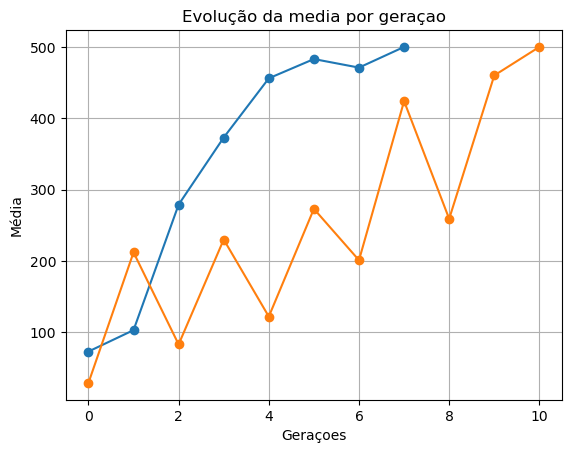

In [72]:
# Lista para armazenar as médias
medias_Dados_CartPole_True_Pais = []
medias_Dados_CartPole_False_Pais = []

# Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_True_Pais["recompencas por geracao"]:
    media = max(lista)
    medias_Dados_CartPole_True_Pais.append(media)

    # Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_False_Pais["recompencas por geracao"]:
    media = max(lista)
    medias_Dados_CartPole_False_Pais.append(media)

# Plota o gráfico
plt.plot(medias_Dados_CartPole_True_Pais, marker='o')  # Gráfico de linha com marcadores
plt.plot(medias_Dados_CartPole_False_Pais, marker='o')  # Gráfico de linha com marcadores

plt.title('Evolução da media por geraçao')
plt.xlabel('Geraçoes')
plt.ylabel('Média')
plt.grid(True)
plt.show()

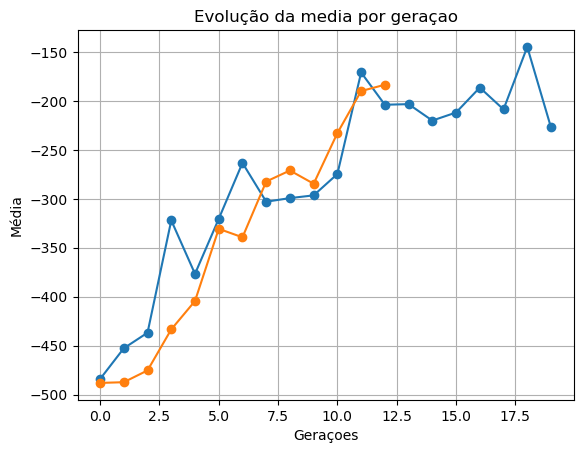

In [47]:
# Lista para armazenar as médias
medias_Dados_CartPole_True_Pais = []
medias_Dados_CartPole_False_Pais = []

# Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_Acrobot_True_Pais["recompencas por geracao"]:
    media = calcular_media(lista)
    medias_Dados_CartPole_True_Pais.append(media)

    # Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_Acrobot_False_Pais["recompencas por geracao"]:
    media = calcular_media(lista)
    medias_Dados_CartPole_False_Pais.append(media)

# Plota o gráfico
plt.plot(medias_Dados_CartPole_True_Pais, marker='o')  # Gráfico de linha com marcadores
plt.plot(medias_Dados_CartPole_False_Pais, marker='o')  # Gráfico de linha com marcadores

plt.title('Evolução da media por geraçao')
plt.xlabel('Geraçoes')
plt.ylabel('Média')
plt.grid(True)
plt.show()

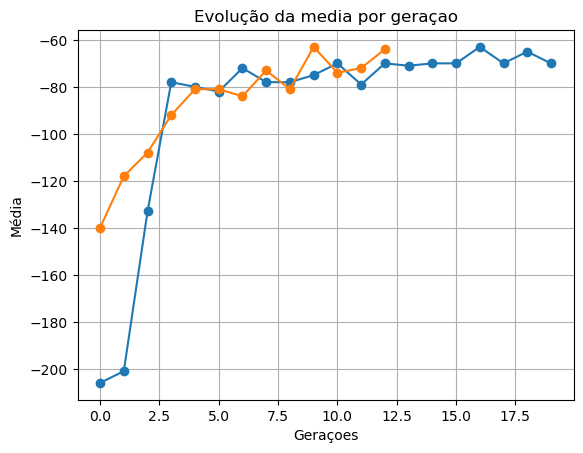

In [48]:
# Lista para armazenar as médias
medias_Dados_Acrobot_True_Pais = []
medias_Dados_Acrobot_False_Pais = []

# Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_Acrobot_True_Pais["recompencas por geracao"]:
    media = max(lista)
    medias_Dados_Acrobot_True_Pais.append(media)

    # Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_Acrobot_False_Pais["recompencas por geracao"]:
    media = max(lista)
    medias_Dados_Acrobot_False_Pais.append(media)

# Plota o gráfico
plt.plot(medias_Dados_Acrobot_True_Pais, marker='o')  # Gráfico de linha com marcadores
plt.plot(medias_Dados_Acrobot_False_Pais, marker='o')  # Gráfico de linha com marcadores

plt.title('Evolução da media por geraçao')
plt.xlabel('Geraçoes')
plt.ylabel('Média')
plt.grid(True)
plt.show()

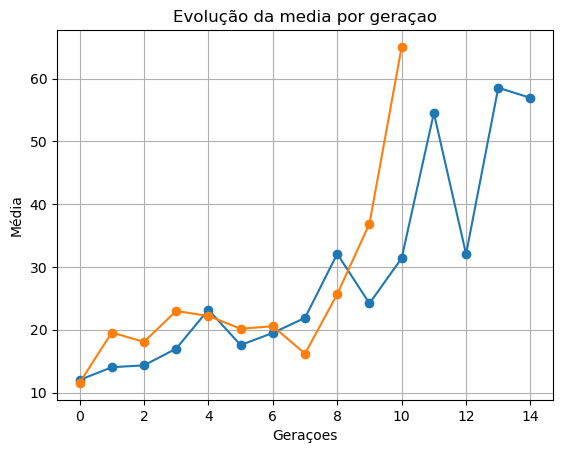

In [49]:
# Lista para armazenar as médias
medias_Dados_CartPole_True_Aleatorio = []
medias_Dados_CartPole_False_Aleatorio = []

# Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_True_Aleatorio["recompencas por geracao"]:
    media = calcular_media(lista)
    medias_Dados_CartPole_True_Aleatorio.append(media)

    # Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_False_Aleatorio["recompencas por geracao"]:
    media = calcular_media(lista)
    medias_Dados_CartPole_False_Aleatorio.append(media)

# Plota o gráfico
plt.plot(medias_Dados_CartPole_True_Aleatorio, marker='o')  # Gráfico de linha com marcadores
plt.plot(medias_Dados_CartPole_False_Aleatorio, marker='o')  # Gráfico de linha com marcadores

plt.title('Evolução da media por geraçao')
plt.xlabel('Geraçoes')
plt.ylabel('Média')
plt.grid(True)
plt.show()

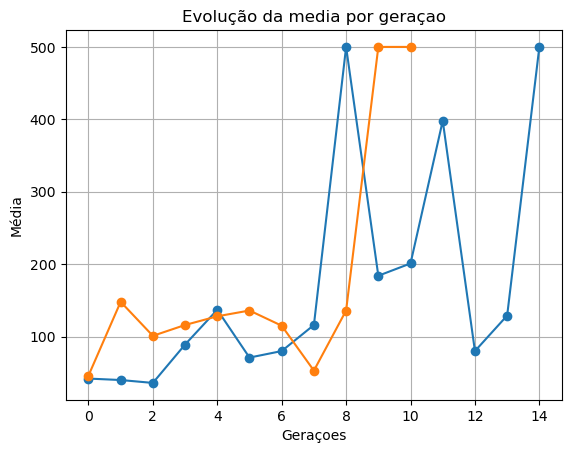

In [50]:
# Lista para armazenar as médias
medias_Dados_CartPole_True_Aleatorio = []
medias_Dados_CartPole_False_Aleatorio = []

# Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_True_Aleatorio["recompencas por geracao"]:
    media = max(lista)
    medias_Dados_CartPole_True_Aleatorio.append(media)

    # Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_False_Aleatorio["recompencas por geracao"]:
    media = max(lista)
    medias_Dados_CartPole_False_Aleatorio.append(media)

# Plota o gráfico
plt.plot(medias_Dados_CartPole_True_Aleatorio, marker='o')  # Gráfico de linha com marcadores
plt.plot(medias_Dados_CartPole_False_Aleatorio, marker='o')  # Gráfico de linha com marcadores

plt.title('Evolução da media por geraçao')
plt.xlabel('Geraçoes')
plt.ylabel('Média')
plt.grid(True)
plt.show()

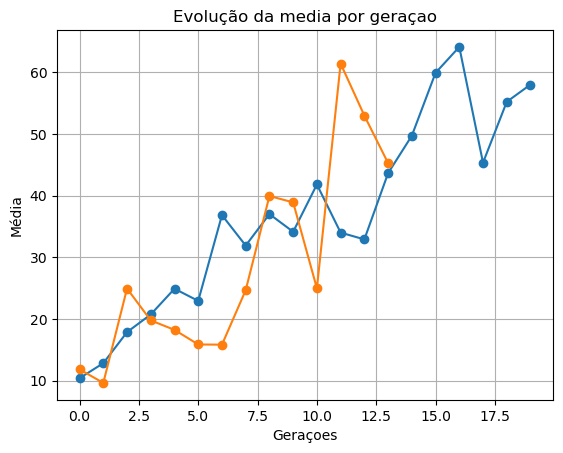

In [61]:
# Lista para armazenar as médias
medias_Dados_CartPole_True_Aleatorio_refinado = []
medias_Dados_CartPole_False_Aleatorio_refinado = []

# Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_True_Aleatorio_refinado["recompencas por geracao"]:
    media = calcular_media(lista)
    medias_Dados_CartPole_True_Aleatorio_refinado.append(media)

    # Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_False_Aleatorio_refinado["recompencas por geracao"]:
    media = calcular_media(lista)
    medias_Dados_CartPole_False_Aleatorio_refinado.append(media)

# Plota o gráfico
plt.plot(medias_Dados_CartPole_True_Aleatorio_refinado, marker='o')  # Gráfico de linha com marcadores
plt.plot(medias_Dados_CartPole_False_Aleatorio_refinado, marker='o')  # Gráfico de linha com marcadores

plt.title('Evolução da media por geraçao')
plt.xlabel('Geraçoes')
plt.ylabel('Média')
plt.grid(True)
plt.show()

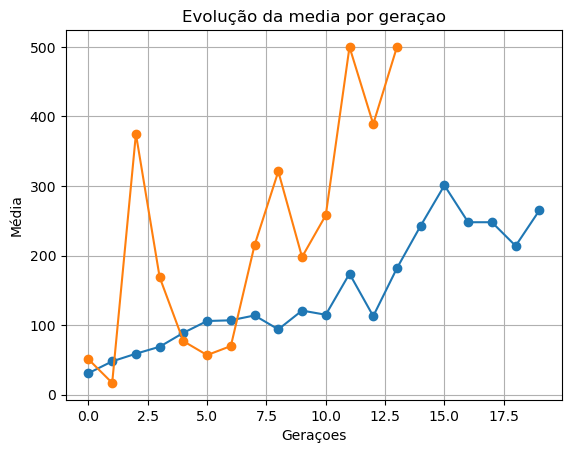

In [73]:
# Lista para armazenar as médias
medias_Dados_CartPole_True_Aleatorio_refinado = []
medias_Dados_CartPole_False_Aleatorio_refinado = []

# Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_True_Aleatorio_refinado["recompencas por geracao"]:
    media = max(lista)
    medias_Dados_CartPole_True_Aleatorio_refinado.append(media)

    # Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_False_Aleatorio_refinado["recompencas por geracao"]:
    media = max(lista)
    medias_Dados_CartPole_False_Aleatorio_refinado.append(media)

# Plota o gráfico
plt.plot(medias_Dados_CartPole_True_Aleatorio_refinado, marker='o')  # Gráfico de linha com marcadores
plt.plot(medias_Dados_CartPole_False_Aleatorio_refinado, marker='o')  # Gráfico de linha com marcadores

plt.title('Evolução da media por geraçao')
plt.xlabel('Geraçoes')
plt.ylabel('Média')
plt.grid(True)
plt.show()

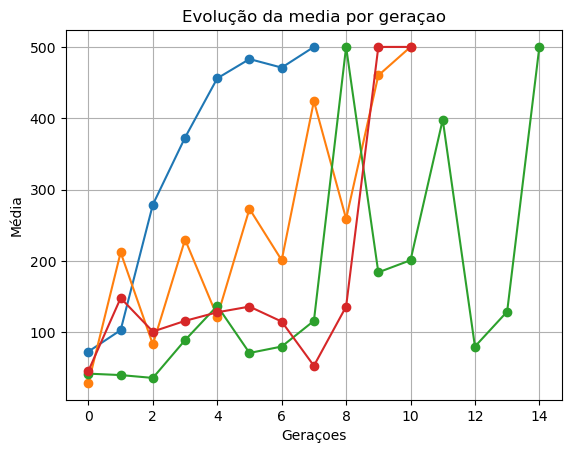

In [70]:
# Lista para armazenar as médias
medias_Dados_Acrobot_True_Pais = []
medias_Dados_Acrobot_False_Pais = []
media_Dados_CartPole_True_Aleatorio = []
media_Dados_CartPole_Fause_Aleatorio = []

# Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_True_Pais["recompencas por geracao"]:
    media = max(lista)
    medias_Dados_Acrobot_True_Pais.append(media)

    # Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_False_Pais["recompencas por geracao"]:
    media = max(lista)
    medias_Dados_Acrobot_False_Pais.append(media)

# Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_True_Aleatorio["recompencas por geracao"]:
    media = max(lista)
    media_Dados_CartPole_True_Aleatorio.append(media)

    # Calcula a média de cada lista e adiciona à lista de médias
for lista in Dados_CartPole_False_Aleatorio["recompencas por geracao"]:
    media = max(lista)
    media_Dados_CartPole_Fause_Aleatorio.append(media)

# Plota o gráfico
plt.plot(medias_Dados_Acrobot_True_Pais, marker='o')  # Gráfico de linha com marcadores
plt.plot(medias_Dados_Acrobot_False_Pais, marker='o')  # Gráfico de linha com marcadores
plt.plot(media_Dados_CartPole_True_Aleatorio, marker='o')  # Gráfico de linha com marcadores
plt.plot(media_Dados_CartPole_Fause_Aleatorio, marker='o')  # Gráfico de linha com marcadores

plt.title('Evolução da media por geraçao')
plt.xlabel('Geraçoes')
plt.ylabel('Média')
plt.grid(True)
plt.show()

In [76]:
mediappo = calcular_media(Dados_CartPole_PPO)
print(f"Usando o algoritmo de aprendizagem por reforço PPO, ao longo de {len(Dados_CartPole_PPO)} jogos, foram necessários em média {round(mediappo)} passos para concluir o ambiente.")
print(f"O que mais passos: {max(Dados_CartPole_PPO)}")

Usando o algoritmo de aprendizagem por reforço PPO, ao longo de 96 jogos, foram necessários em média 551 passos para concluir o ambiente.
O que mais passos: 2307
